<font size=6><b>Lec04. MNIST DL

In [26]:
import tensorflow
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.models import Sequential

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings(action='ignore')

from IPython.core.display import display, HTML
display(HTML("<style>.container{width:100% !important;}</style>"))
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_columns', 150)
pd.set_option('max_colwidth', None)



In [9]:
np.random.seed(1234)
tf.random.set_seed(1234)

# Data Load

In [38]:
(X_train, y_train), (X_test, y_test) = tensorflow.keras.datasets.mnist.load_data()

In [39]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

# EDA

## 이미지셋

In [40]:
print(y_train[0],X_train[0])

5 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 

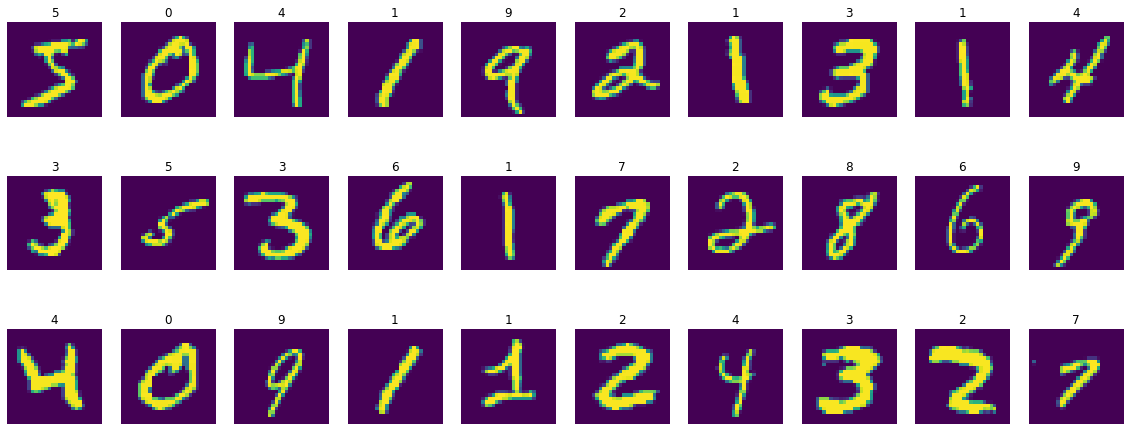

In [51]:
px, ax = plt.subplots(3, 10, figsize=(20,8))
plt.axis('off')
for i, x in enumerate(range(30)) :
    r = i//10
    c = i%10
    ax[r][c].imshow(X_train[x])
    ax[r][c].set_title(y_train[i])
    ax[r][c].axis('Off')
plt.show()    

## 타겟 분포도

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
dtype: int64


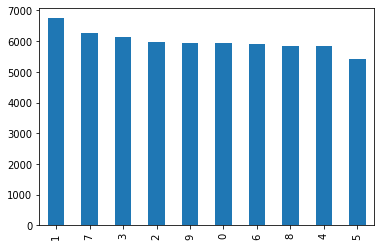

In [54]:
print( pd.Series(y_train).value_counts() )
pd.Series(y_train).value_counts().plot.bar()
plt.show()

In [60]:
idx_list = []
s = pd.Series(y_train)
for i in range(10):
    idx_list.extend(s[s.values == i].index[:10])
print( len(idx_list) , idx_list )

100 [1, 21, 34, 37, 51, 56, 63, 68, 69, 75, 3, 6, 8, 14, 23, 24, 40, 59, 67, 70, 5, 16, 25, 28, 76, 82, 109, 117, 120, 122, 7, 10, 12, 27, 30, 44, 49, 50, 74, 86, 2, 9, 20, 26, 53, 58, 60, 61, 64, 89, 0, 11, 35, 47, 65, 100, 132, 138, 145, 173, 13, 18, 32, 36, 39, 62, 66, 73, 83, 90, 15, 29, 38, 42, 52, 71, 79, 84, 91, 96, 17, 31, 41, 46, 55, 85, 94, 97, 125, 137, 4, 19, 22, 33, 43, 45, 48, 54, 57, 80]


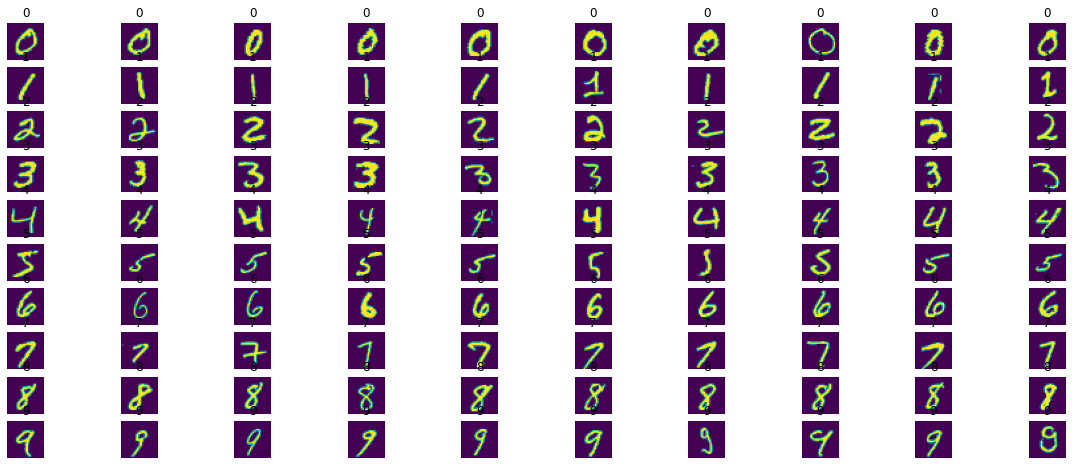

In [63]:
px, ax = plt.subplots(10, 10, figsize=(20,8))
plt.axis('off')
for i, idx in enumerate(idx_list) :
    r = i//10
    c = i%10
    ax[r][c].imshow(X_train[idx])
    ax[r][c].set_title(y_train[idx])
    ax[r][c].axis('Off')
plt.show()    

# 전처리 & 가공
* 픽셀 (정규화)표준화  
* -------------------  StandardScaler (평균0 편차1 범위로 데이터 축소)
* -------------------  MinMaxScaler (최소0 최대1 범위로 데이터 축소)
* 이미지 크기 맞추기 ----------- NPL.padding
* 부족한 데이터 증강 ----------- SMOTE

## X  : 픽셀 (정규화)표준화

In [86]:
X_train_scaler = X_train / 255.0
X_test_scaler = X_test / 255.0

In [79]:
# X_trian_scaler[:1]

## y : 원핫인코딩

In [87]:
from tensorflow.keras.utils import to_categorical
y_train_oh = to_categorical(y_train,  num_classes=10, dtype='int32')
y_test_oh  = to_categorical(y_test,  num_classes=10, dtype='int32')

In [88]:
y_train[:5], y_train_oh[:5]

(array([5, 0, 4, 1, 9], dtype=uint8),
 array([[0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]]))

In [89]:
len(X_train[0])

28

## X: flatten()

In [106]:
X_train.shape, X_test.shape

((60000, 784), (10000, 28, 28))

In [107]:
X_trian_scaler = X_trian_scaler.reshape(X_train.shape[0], -1)  #  (60000, 784)
X_test_scaler = X_test_scaler.reshape(X_test.shape[0], -1)     #  (10000, 784)

In [108]:
X_trian_scaler.shape, X_test_scaler.shape

((60000, 784), (10000, 784))

# 모델

In [109]:
model_c = Sequential()
model_c.add(Dense(units=10,  activation='relu',  input_dim=784))  
# model_c.add(Dense(units=10,  activation='relu',  input_dim=28*28))  
# model_c.add(Dense(units=64,  activation='relu',  input_shape=(28*28, ) ))  
model_c.add(Dense(units=64,  activation='relu')) 
model_c.add(Dense(units=32,  activation='relu')) 
model_c.add(Dense(units=16,  activation='relu')) 
model_c.add(Dense(units=10 , activation='softmax'))      #--------------- 멀티분류

model_c.compile(optimizer='adam',              
            loss='categorical_crossentropy',             #------원핫인코딩
            metrics=['accuracy'])              
print(model_c.summary())

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 10)                7850      
                                                                 
 dense_37 (Dense)            (None, 64)                704       
                                                                 
 dense_38 (Dense)            (None, 32)                2080      
                                                                 
 dense_39 (Dense)            (None, 16)                528       
                                                                 
 dense_40 (Dense)            (None, 10)                170       
                                                                 
Total params: 11,332
Trainable params: 11,332
Non-trainable params: 0
_________________________________________________________________
None


## 평가 검증

In [110]:
fit_res = model_c.fit(X_trian_scaler, y_train_oh   #------X:sacling  y:onhot-encodin
                  , batch_size=10
                  , epochs=100
                  , validation_data=(X_test_scaler, y_test_oh)
                 )

loss, acc = model_c.evaluate(X_test_scaler, y_test_oh)
print(f"loss: {loss}  accuracy : {acc}")

Epoch 1/100
2000/2000 [==============================] - 5s 2ms/step - loss: 0.4684 - accuracy: 0.8518 - val_loss: 0.2802 - val_accuracy: 0.9143
Epoch 2/100
2000/2000 [==============================] - 5s 2ms/step - loss: 0.2576 - accuracy: 0.9237 - val_loss: 0.2139 - val_accuracy: 0.9354
Epoch 3/100
2000/2000 [==============================] - 4s 2ms/step - loss: 0.2141 - accuracy: 0.9369 - val_loss: 0.1910 - val_accuracy: 0.9401
Epoch 4/100
1230/2000 [=================>............] - ETA: 1s - loss: 0.1959 - accuracy: 0.9418


KeyboardInterrupt

